In [5]:
tf.config.experimental.list_physical_devices('GPU') 

[]

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)     

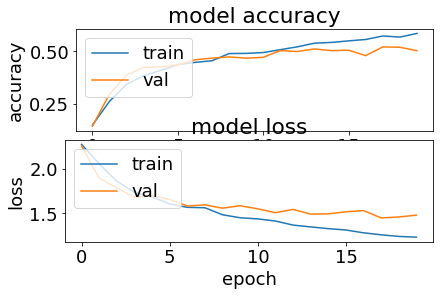

              precision    recall  f1-score   support

           0       0.57      0.74      0.65       505
           1       0.65      0.84      0.73       460
           2       0.63      0.43      0.51       519
           3       0.56      0.48      0.52       486
           4       0.53      0.55      0.54       519
           5       0.75      0.38      0.51       488
           6       0.54      0.80      0.65       518
           7       0.69      0.71      0.70       486
           8       0.74      0.65      0.69       520
           9       0.73      0.70      0.72       498

    accuracy                           0.63      4999
   macro avg       0.64      0.63      0.62      4999
weighted avg       0.64      0.63      0.62      4999

[[376  31  13   4  14   0   4   7  43  13]
 [ 13 387   2   0   5   0   8   2  14  29]
 [ 46  10 221  36  80  10  68  25  16   7]
 [ 12  13  19 233  41  26  91  18  10  23]
 [ 35   8  30  22 288   8  75  37   9   7]
 [ 17  15  25  76  45 186 

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
